# Basic Device Data

A couple lines of code to get up and running with Pulsepod data

In [2]:
%load_ext autoreload
%autoreload 2

import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

from arable_constants import *
from arable_physics import *
import podlib

In [3]:
# Read in Calibration parameters
c = podlib.Calvals()

# Read in a local file 
podfile = r'../dat/6_23_B00009_UNL_data.csv'
poddata = pd.read_csv(podfile)

# Calibrate L0 (raw) data to L1 data (calibrated to physical units)
B00009 = podlib.L1(L0 = poddata, calval = c)

# Air Properties

/usr/local/lib/python2.7/site-packages/matplotlib/axes/_axes.py:475: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


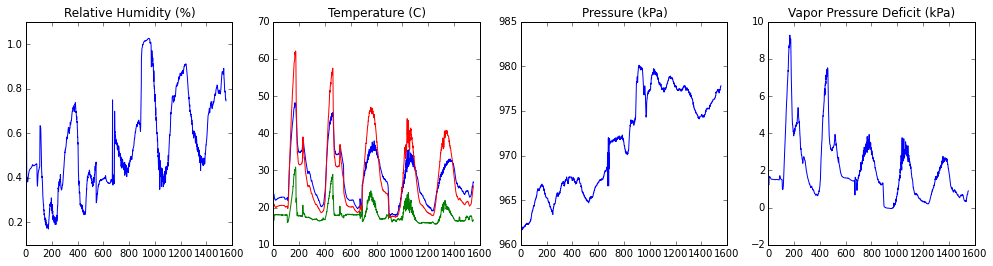

In [4]:
fig, axes = plt.subplots(1, 4, figsize=(17,4))
axes[0].plot(B00009.df['RH'])
axes[0].set_title("Relative Humidity (%)")

axes[1].plot(B00009.df['P_T'], label="T air")
axes[1].plot(B00009.df['Tabove'], label="T sky")
axes[1].plot(B00009.df['Tbelow'], label="T surf")
axes[1].set_title("Temperature (C)")
plt.legend()

axes[2].plot(B00009.df['P'])
axes[2].set_title("Pressure (kPa)")

VPD = VPD_(B00009.df['P_T'], B00009.df['RH'])
axes[3].plot(VPD)
axes[3].set_title("Vapor Pressure Deficit (kPa)")


# Surface Energy Balance

Net Radiation:
$$R_{net} = SW_{down} + SW_{up} + LW_{down} + LW_{up}$$


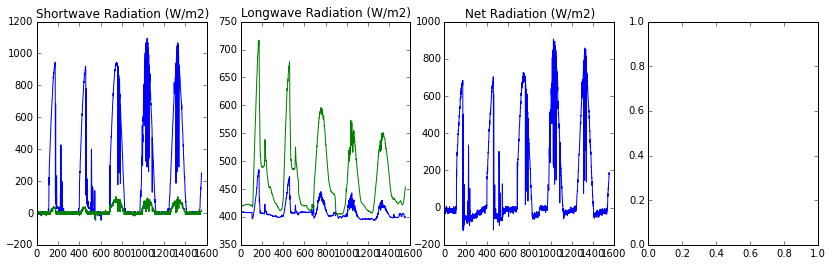

In [5]:
fig, axes = plt.subplots(1, 4, figsize=(14,4))

axes[0].plot(B00009.df['SWdw'])
axes[0].plot(-B00009.df['SWuw'])
axes[0].set_title("Shortwave Radiation (W/m2)")

axes[1].plot(B00009.df['LWdw'])
axes[1].plot(-B00009.df['LWuw'])
axes[1].set_title("Longwave Radiation (W/m2)")

axes[2].plot(B00009.df['SWdw'] + B00009.df['SWuw'] + B00009.df['LWdw'] + B00009.df['LWuw'])
axes[2].set_title("Net Radiation (W/m2)")

# Crop Water Demand / Evaporation Rate
This is an overview of the governing equations required to take pod data to compute crop water demand using a modified Penman-Monteith equation.

Latent Heat Flux: $$\lambda E = \frac{\Delta R_n + \rho C_p (e_s(T) - e_a) r_H^{-1}}{\Delta + \gamma}$$

Sensible Heat Flux: $$H = \frac{\gamma R_n + \rho C_p (e_s(T) - e_a) r_H^{-1}}{\Delta + \gamma}$$


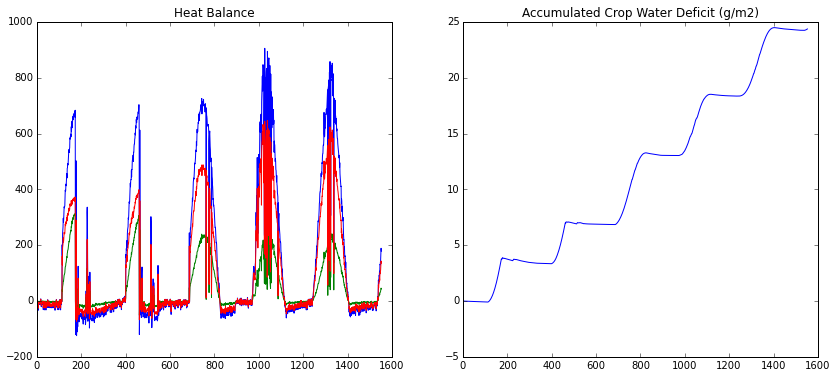

In [6]:
Delta = s_(B00009.df['P_T'])  # kPa / C
Rn = B00009.df['SWdw'] + B00009.df['SWuw'] + B00009.df['LWdw'] + B00009.df['LWuw']  # W/m2
rho = dry_air_(B00009.df['P_T'], B00009.df['RH'], B00009.df['P']/100.) # kg / m3
VPD = VPD_(B00009.df['P_T'], B00009.df['RH'])
rH = 500 # s/m
gamma = gamma_(B00009.df['P_T'], B00009.df['P']) # kPa / C

LE = (Delta*Rn + rho*Cp*VPD/rH) / (Delta + gamma)
H = (gamma*Rn + rho*Cp*VPD/rH) / (Delta + gamma)
E = LE / lambda_(B00009.df['P_T'])

fig, axes = plt.subplots(1, 2, figsize=(14,6))

axes[0].plot(Rn, label="Rn")
axes[0].plot(LE, label="LE")
axes[0].plot(H, label="H")
axes[0].set_title("Heat Balance")

axes[1].plot(np.cumsum(E))
axes[1].set_title("Accumulated Crop Water Deficit (g/m2)")


In [8]:
Delta

0       0.177997
1       0.177343
2       0.176785
3       0.175580
4       0.175026
5       0.174474
6       0.168855
7       0.167696
8       0.166015
9       0.165487
10      0.164436
11      0.163825
12      0.162783
13      0.162178
14      0.161144
15      0.161144
16      0.161144
17      0.161144
18      0.161144
19      0.161660
20      0.161660
21      0.162178
22      0.162178
23      0.162783
24      0.162783
25      0.162783
26      0.163303
27      0.163303
28      0.163825
29      0.163825
          ...   
1524    0.168855
1525    0.168855
1526    0.168855
1527    0.168855
1528    0.169392
1529    0.169930
1530    0.171011
1531    0.171645
1532    0.172189
1533    0.172735
1534    0.173923
1535    0.173923
1536    0.177343
1537    0.180915
1538    0.180915
1539    0.184451
1540    0.188144
1541    0.190607
1542    0.191202
1543    0.195616
1544    0.193098
1545    0.196225
1546    0.196835
1547    0.199394
1548    0.203338
1549    0.205968
1550    0.208627
1551    0.2079